# Sensors data corelation Mindaugas Bereiša interpretation

In [1]:
import matplotlib.pyplot as plt
import time
from scipy.fftpack import fft
from scipy import signal
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from numpy import fft as npfft
import pylab as pl
import numpy as np
import pandas as pd
import datetime
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import lag_plot
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error
from matplotlib import pyplot as plt
from scipy.signal import savgol_filter

# Relationship emong data

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
df=pd.read_csv('data_zero.csv')
path = 'data_zero.csv'
df=pd.read_csv(path)
columns_names = df.columns
df.index = pd.to_datetime(df[columns_names[0]]/1000, unit='s')
# df.drop(columns[0], axis = 1)
delite_column = columns_names[0]
df = df.drop(delite_column, axis = 1) 
df.sort_index(inplace= True)
# ---------------
speed = 1
dfx = df[::speed]
# ---------------
dfx

,P20113,P20110,P10216,P10215,P10116,P10115,P10110,P7500
miliseka,,,,,,,,
2013-04-24 07:42:48.569999933,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2013-04-24 07:42:48.579999924,-0.003750,-0.002499,0.000313,0.000313,0.000000,-0.000313,0.000937,0.000312
2013-04-24 07:42:48.589999914,-0.007502,-0.003437,0.000626,0.000313,0.000000,-0.000626,0.000937,0.000937
2013-04-24 07:42:48.599999905,-0.009064,-0.004999,0.000938,0.000002,0.000313,-0.000313,0.000937,0.000937
2013-04-24 07:42:48.609999895,-0.010626,-0.007812,0.001251,0.000002,0.000626,-0.000313,0.000937,0.000000
...,...,...,...,...,...,...,...,...
2013-04-24 08:02:48.519999981,0.023746,0.027811,0.027811,0.030937,0.004065,0.008438,0.005313,0.000000
2013-04-24 08:02:48.529999970,0.021559,0.025936,0.027811,0.030937,0.003754,0.008125,0.005938,0.000312
2013-04-24 08:02:48.539999962,0.019373,0.024059,0.027811,0.031250,0.003754,0.007812,0.005938,0.000937


In [3]:
def taking_of_nan_values_DF(dfx):
    # interpolation
    dfx = dfx.interpolate(method='linear', limit_direction='forward', axis=0)
    # taking of nullmi
    dfx = dfx.fillna(method='ffill')
    dfx = dfx.fillna(method='bfill')
    return dfx

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
rolling1 = 100
dfx[1:] = dfx[1:].rolling(window=rolling1).mean()

In [6]:
dfx = taking_of_nan_values_DF(dfx)


In [7]:
def shifting_time_sensor_perfect_fit(df):
    from statsmodels.tsa.seasonal import seasonal_decompose
    half=int(len(df)/2)
    df_half = df[:half]
    df_half = taking_of_nan_values_DF(df_half)
    shift_test = int(half/50)
    for i in range(len(df.columns)-3):         
        column_start = df_half.columns[i+1]
        column_end = df_half.columns[i+3]
        best_shift_nr = 0
        shift_step = 0
        np_sqrt_mean_squared_error_min = 0
        
        df_first = df_half[column_start]
        df_second = df_half[column_end]      

        for shift_step in range((-1)*shift_test,shift_test,rolling1):            
            df_shift_second = df_second.shift(shift_step)
            df_shift_second = taking_of_nan_values_DF(df_shift_second)

            np_sqrt_mean_squared_error = np.sqrt(mean_squared_error(df_first,df_shift_second))
            
            if np_sqrt_mean_squared_error_min == 0:
                np_sqrt_mean_squared_error_min = np_sqrt_mean_squared_error
            
            if np_sqrt_mean_squared_error_min > np_sqrt_mean_squared_error:
                np_sqrt_mean_squared_error_min = np_sqrt_mean_squared_error
                best_shift_nr = shift_step
                
        print('shift_step = ', shift_step, 'qrt_mean_squared_error' ,np_sqrt_mean_squared_error, 'best_shift_nr = ', best_shift_nr)    

        df_second = df_second.shift(best_shift_nr)
        df_second = taking_of_nan_values_DF(df_second)
 
        plt.figure(figsize=(20, 10))
        plt.plot(df_first,label=df.columns)
        plt.plot(df_second, label=df.columns)
        plt.title('Shifting_time_sensor_perfect_fit_'+ column_start + "-" + column_end)
        plt.xlabel('time')
        plt.ylabel('Value')
        plt.grid()
        plt.show()


shift_step =  1100 qrt_mean_squared_error 0.012396746279369014 best_shift_nr =  -800


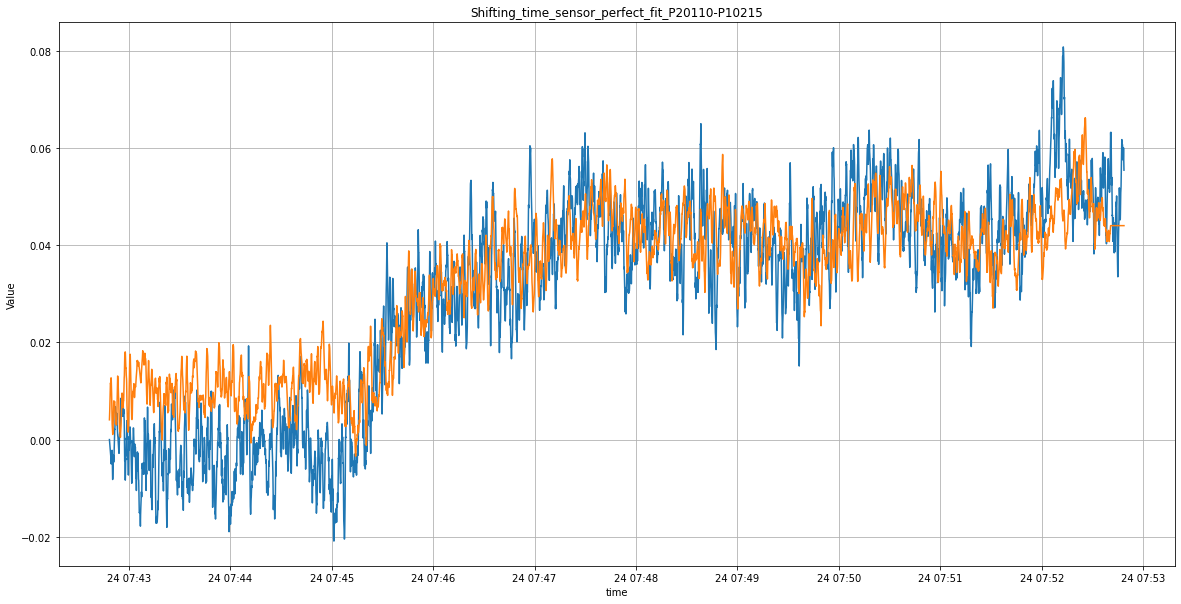

shift_step =  1100 qrt_mean_squared_error 0.021677188245123595 best_shift_nr =  0


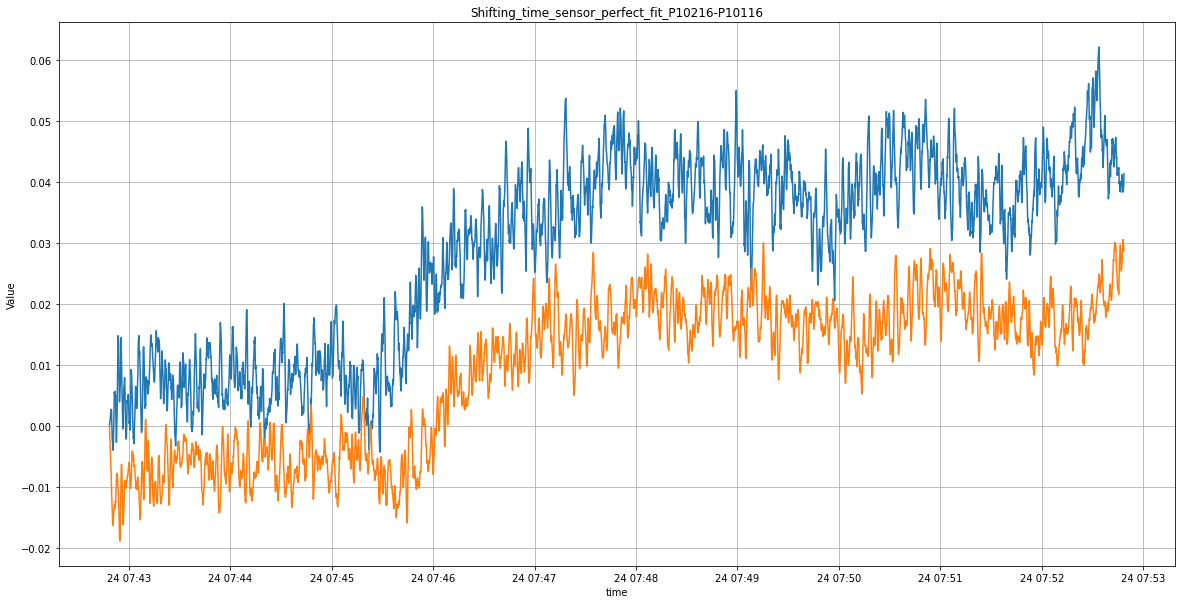

shift_step =  1100 qrt_mean_squared_error 0.023348565296450047 best_shift_nr =  0


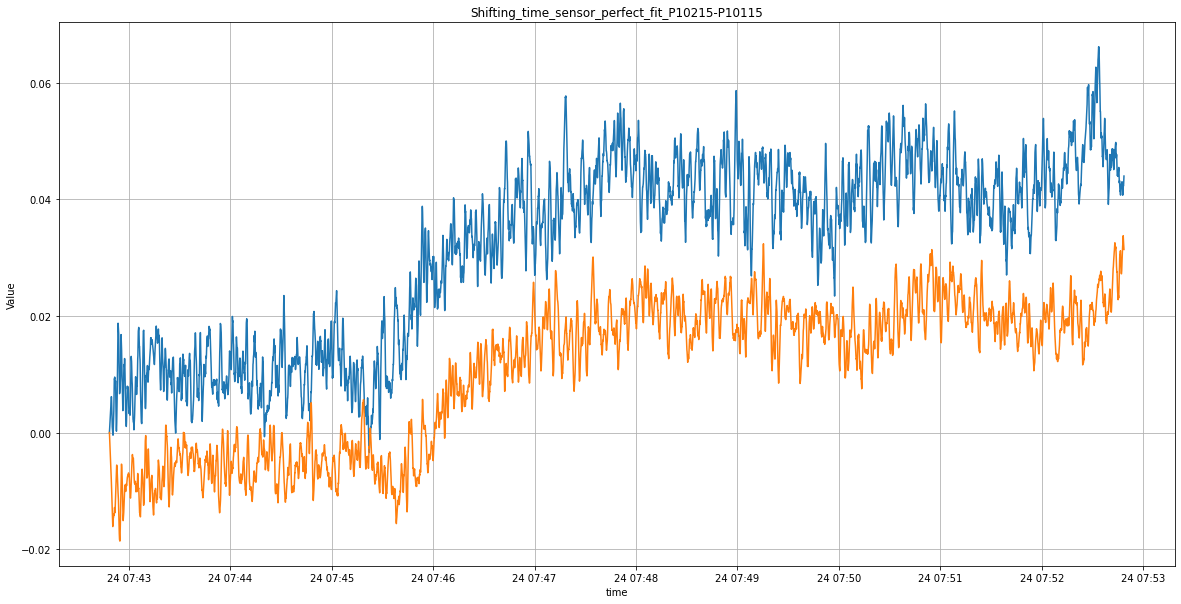

shift_step =  1100 qrt_mean_squared_error 0.01311142074986279 best_shift_nr =  900


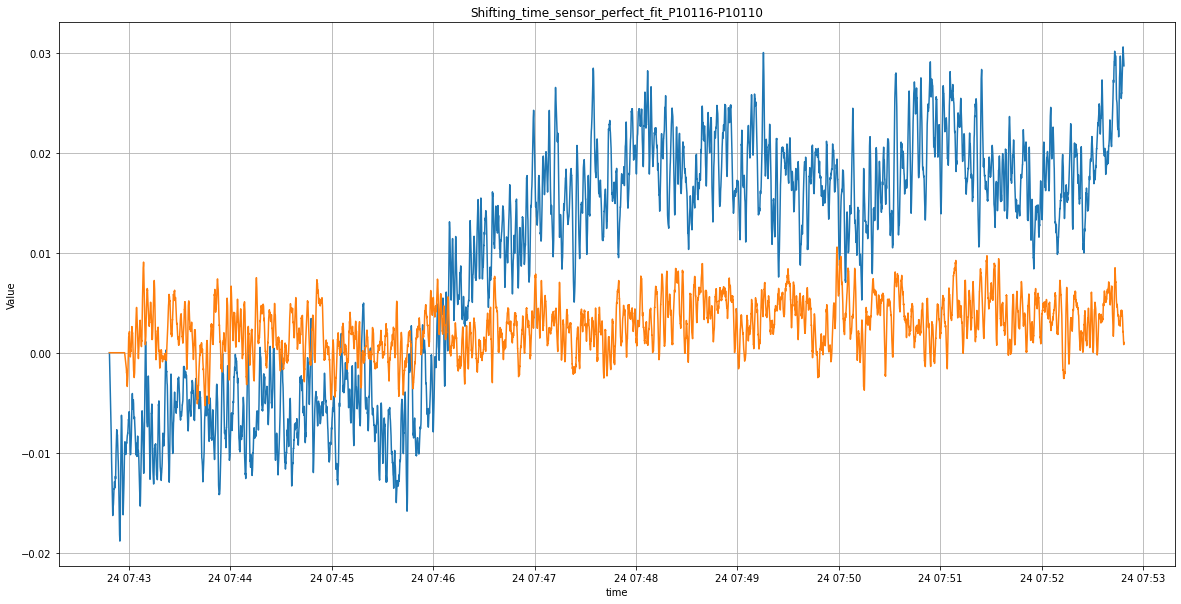

shift_step =  1100 qrt_mean_squared_error 0.013844600735673073 best_shift_nr =  900


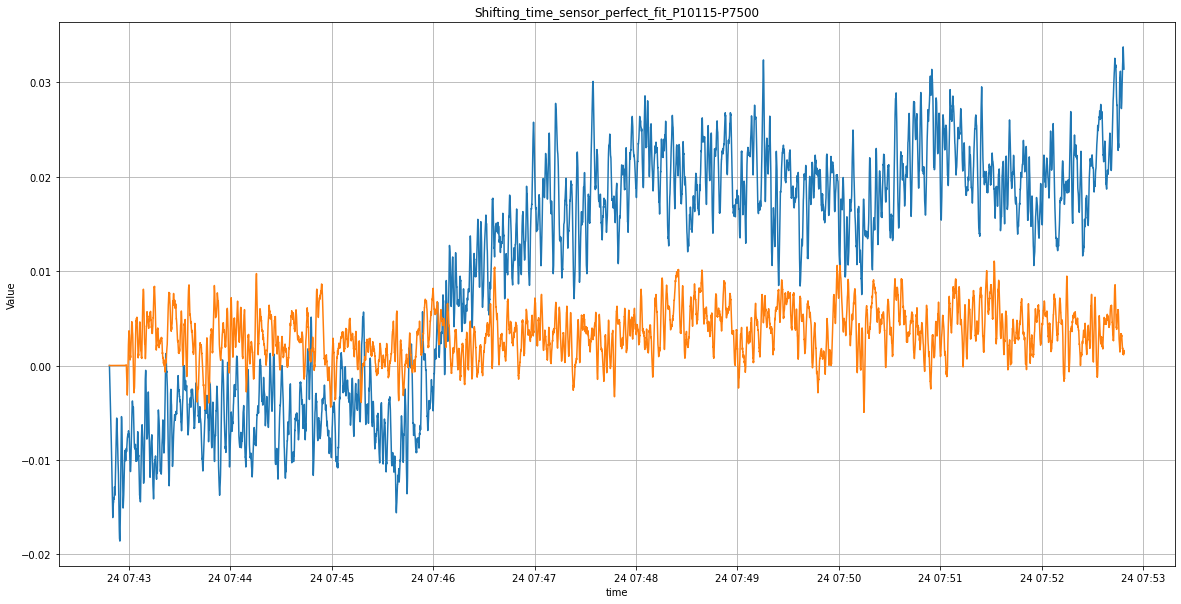

In [8]:
shifting_time_sensor_perfect_fit(dfx)